# "DuckDuckGo Dataset Creation"
> "Scraping images to create image classification datasets"

- toc: true
- branch: master
- comments: true
- author: Chelsea Tucker
- categories: [jupyter]

<img src="images/2021-11-16-imagescraping2.jpg">

# 1. Introduction

I near gave up on creating my own image scraped datasets when I tried using [Bing's Image Search API](https://www.microsoft.com/en-us/bing/apis/bing-image-search-api). Me and Bing don't see eye-to-eye it seems. Good job [DuckDuckGo](https://duckduckgo.com/) swooped in to save the day. Below gives an overview of how I collated a couple of datasets to train some neural networks. The image scraper library I use is courtesy of [Joe Dockerill](https://joedockrill.github.io/blog/2020/09/18/jmd-imagescraper-library/). Big up to this guy for creating it.

# 2. Image Scraping

In [1]:
# Importing libraries
import os
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from jmd_imagescraper.core import * 
from jmd_imagescraper.imagecleaner import *

The first dataset I want to create is a pets dataset. I'd like to create a model that, given an image of a household pet, can state what type of pet it is. I'm going with cats, dogs and rabbits to begin with. 

In [2]:
#hide_output
# Path where I'm going to save the scraped images
path = Path().cwd()/"pets"
# The types of pet I'm interested in
pets = ["dog", "cat", "rabbit"]

# Scraping the images
for pet in pets:
    duckduckgo_search(path, pet, pet, max_results=10, img_layout=ImgLayout.All);

Duckduckgo search: dog


Duckduckgo search: cat


Duckduckgo search: rabbit


The below function is an image cleaner widget that comes with Joe's library. Widgets are a great, user-friendly way of viewing, organising and preparing a dataset in preparation for training a model with it. 

In [3]:
display_image_cleaner(path);

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

The above widget is also great for finding those pesky images that just shouldn't be there. For example, as much as I enjoyed finding this image in the 'dog' folder, it doesn't quite fit my requirement.

<img src="images/2021-11-16-imagescraping1.jpeg" width="400">

# 3. Labelling the data

Quite often the labels of vision datasets are in the file name. I want to keep this system so in the below code I rename all of the files on my local machine to include the pet type. 

In [4]:
#collapse_hide
n=0

while n < len(pets):
    root = path/pets[n]
    files = os.listdir(root)
    label = str(pets[n])
    n += 1
    for index, file in enumerate(files):
        os.rename(os.path.join(root, file), os.path.join(root, ''.join([label, '_', str(index), '.jpg'])))

Let's check this has done the job:

In [5]:
os.listdir(path/"dog")

['dog_9.jpg',
 'dog_8.jpg',
 'dog_6.jpg',
 'dog_7.jpg',
 'dog_5.jpg',
 'dog_4.jpg',
 'dog_0.jpg',
 'dog_1.jpg',
 'dog_3.jpg',
 'dog_2.jpg']

I'm going to use the ImageFolder class in torchvision to load the pets dataset.

The label of the image is: dog


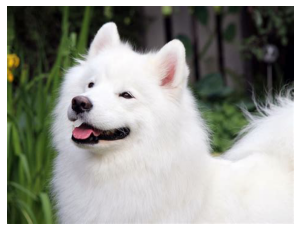

In [9]:
pets_dataset = ImageFolder(path)

random_image = pets_dataset[14][0]
random_image_label = pets_dataset[14][1]

# Looking up the random_image_label in the pets_dataset dictionary
label = [key for key, value in pets_dataset.class_to_idx.items() if value == random_image_label]

# Print the Image using Matplotlib
plt.imshow(random_image)
plt.axis('off')
print("The label of the image is:", label[0])

# 4. Tips & Tricks

I tend to write a little section of tips and tricks that I've learnt whilst writing a notebook. Below are the things that looked into this time. They revolve around environments, how to create them and how to view the packakges installed on them. I was looking into this as I ideally want to create an environment that I know all of these notebook can be run on and avoid breaking any package version dependencies. 

To determine the Anaconda environments available, run the line below. The current environment is the one in the list that is highlighted with an asterisk (*). 

``conda info --envs``

To see a list of all packages installed in a specific environment (here I've chosen "ctenv"), run:

``conda list -n base``

To see if a specific package (here I've chosen [fastai](https://docs.fast.ai/)) is installed in an environment, run:

``conda list -n base fastai``

To install a specific package (here I've chosen [seaborn](https://seaborn.pydata.org/index.html)) into an environment, run:

``conda install -n base seaborn``